<a href="https://colab.research.google.com/github/elahekarimi/Revenue/blob/main/Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("/content/ds_task_ jeff.csv")

# Display the first few rows of the DataFrame
df.head(5)

<ipython-input-2-bbc3e15178c2>:4: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/ds_task_ jeff.csv")


,redirect_id,lead_id,redirect_timestamp,lead_utm_source,lead_utm_medium,lead_utm_campaign,lead_hour_of_registration,lead_weekday_of_registration,lead_month_day_of_registration,lead_referrer,...,a_in_30d,b_cr_to_different_partner,a_cr_to_different_partner,non_converted_to_partner,redirect_partner,converted_to_b,converted_to_a,conversion_revenue,expected_b_revenue,expected_a_revenue
0,2279575,147296aa1ecc1d740ee65c1e6cf7befd79c6d84d4d21bf...,2021-04-05 10:01:54,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,12.0,7.0,4.0,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,...,0,NaN,NaN,0,d8eb2c7e1518a32ff1077264af8067d708354483a439ca...,0,0,0,50.0,NaN
1,2283922,147296aa1ecc1d740ee65c1e6cf7befd79c6d84d4d21bf...,2021-04-05 15:52:38,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,12.0,7.0,4.0,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,...,0,0.0,0.0,0,f00f2889a9ebe18418c7ee6d04ac36611b59b837644624...,0,0,0,10.0,70.0
2,2419471,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:35:40,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,...,0,0.0,0.0,0,fa9f3d2f22b22b9cacb176e9acc31a9c8e93cf2b5676d0...,0,0,0,NaN,80.0
3,2419675,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:45:34,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,...,0,0.0,0.0,1,d8eb2c7e1518a32ff1077264af8067d708354483a439ca...,0,0,0,50.0,NaN
4,2419694,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:46:04,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,...,0,0.0,0.0,0,f00f2889a9ebe18418c7ee6d04ac36611b59b837644624...,0,0,0,10.0,70.0


In [3]:
df.shape

(314151, 215)

In [3]:
df['conversion_revenue']

0         0
1         0
2         0
3         0
4         0
         ..
314146    0
314147    0
314148    0
314149    0
314150    0
Name: conversion_revenue, Length: 314151, dtype: int64

# Drop the columns that have more than 50% missing values

In [4]:
def drop_columns_with_missing_values(df, threshold=0.5):

    # Calculate the proportion of missing values in each column
    missing_value_counts = df.isnull().mean()

    # Get names of columns with missing values exceeding the threshold
    columns_to_drop = missing_value_counts[missing_value_counts > threshold].index.tolist()

    # Drop columns from DataFrame
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

# Example usage:
# Replace 'df' with your DataFrame name
df_cleaned = drop_columns_with_missing_values(df, threshold=0.5)


In [5]:
df_cleaned.shape

(314151, 196)

# Imputing other missing values

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer
df = df_cleaned
def impute_missing_values(df):

    # Identify binary and categorical columns
    binary_cols = [col for col in df.columns if len(df[col].unique()) == 2 and df[col].dtype != 'object']
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

    # Impute binary and categorical columns with mode
    imputer_mode = SimpleImputer(strategy='most_frequent')
    df[binary_cols + categorical_cols] = imputer_mode.fit_transform(df[binary_cols + categorical_cols])

    # Impute numerical columns with mean
    numerical_cols = [col for col in df.columns if col not in binary_cols + categorical_cols]
    imputer_mean = SimpleImputer(strategy='mean')
    df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

    return df

df = impute_missing_values(df)



In [7]:
df.isnull().sum()

redirect_id           0
lead_id               0
redirect_timestamp    0
lead_utm_source       0
lead_utm_medium       0
                     ..
converted_to_b        0
converted_to_a        0
conversion_revenue    0
expected_b_revenue    0
expected_a_revenue    0
Length: 196, dtype: int64

# Visualize to check if there is other missing values or not

<Axes: >

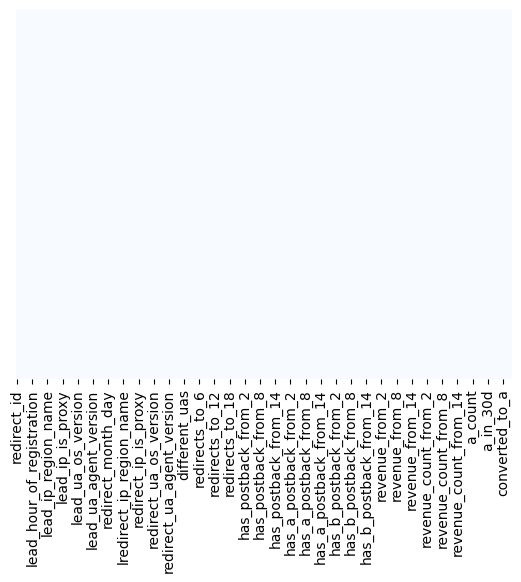

In [13]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='Blues')

# Encoding the categorical variables

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for col in df.select_dtypes(include=['object']):
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded DataFrame
print(df.head())



   redirect_id  lead_id  redirect_timestamp  lead_utm_source  lead_utm_medium  \
0    2279575.0     5256               68015               14                0   
1    2283922.0     5256               71923               14                0   
2    2419471.0    11949              191331                3                0   
3    2419675.0    11949              191507                3                0   
4    2419694.0    11949              191523                3                0   

   lead_utm_campaign  lead_hour_of_registration  lead_weekday_of_registration  \
0                199                       12.0                           7.0   
1                199                       12.0                           7.0   
2                 69                       10.0                           5.0   
3                 69                       10.0                           5.0   
4                 69                       10.0                           5.0   

   lead_month_day_of_regis

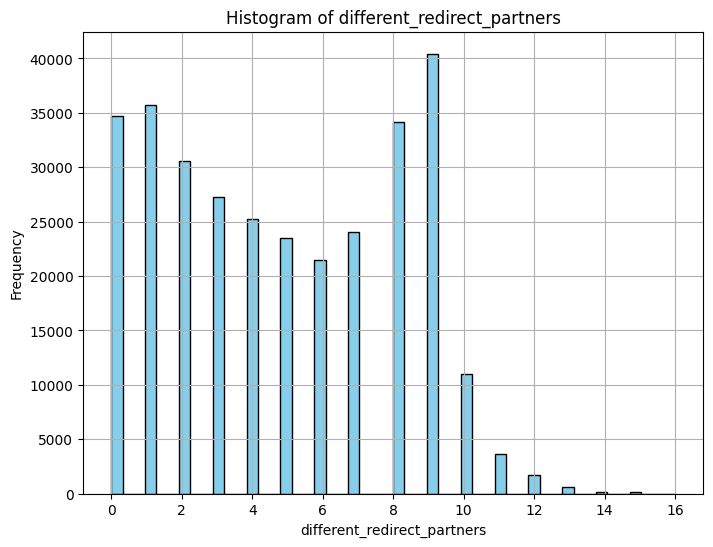

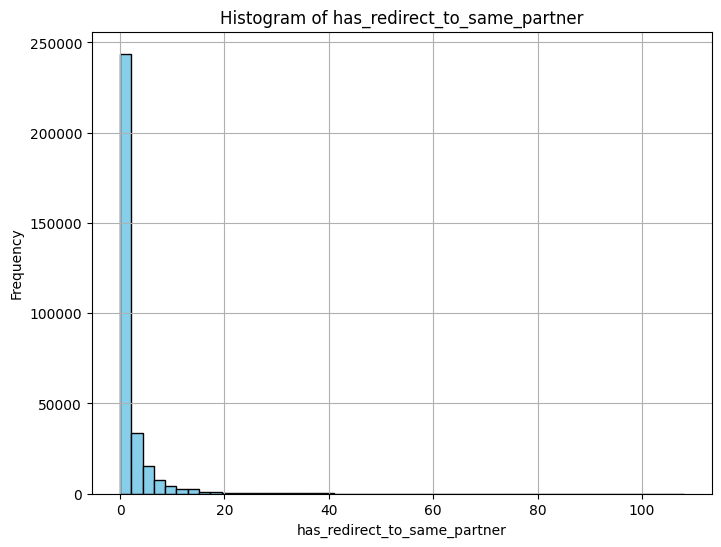

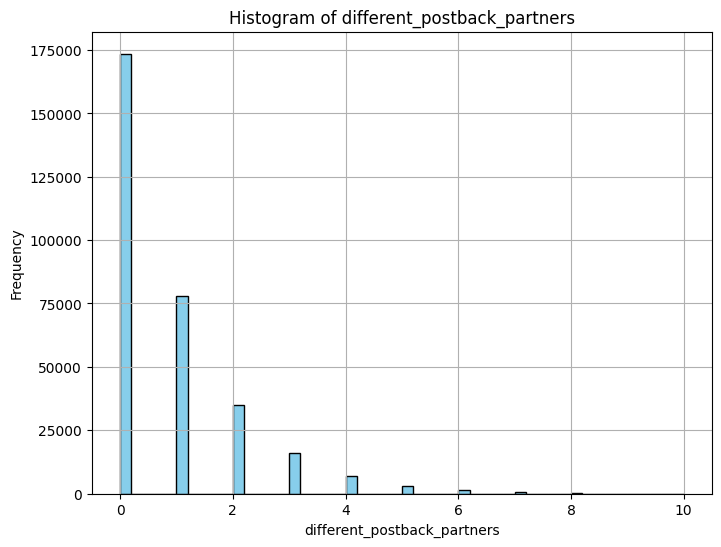

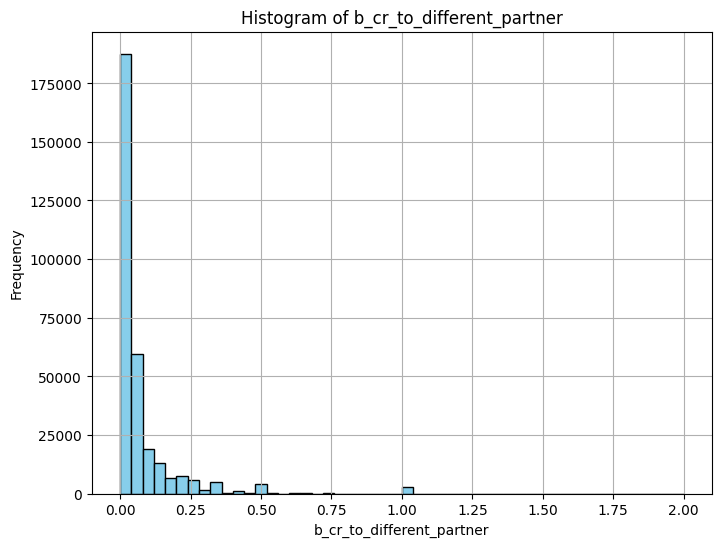

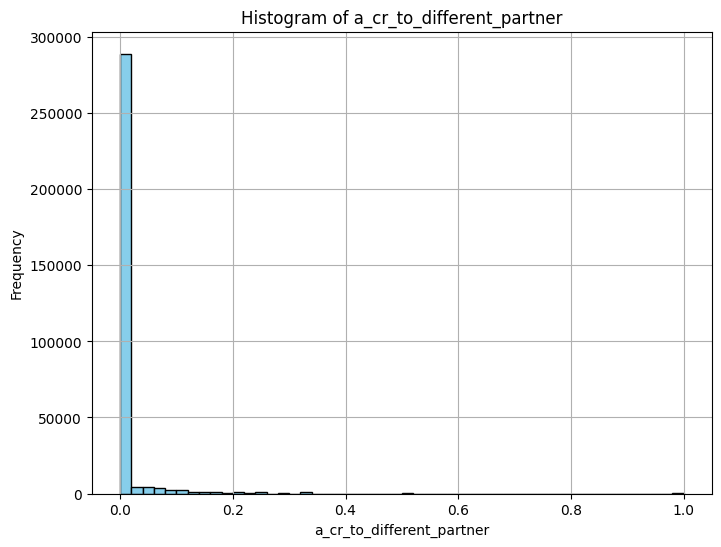

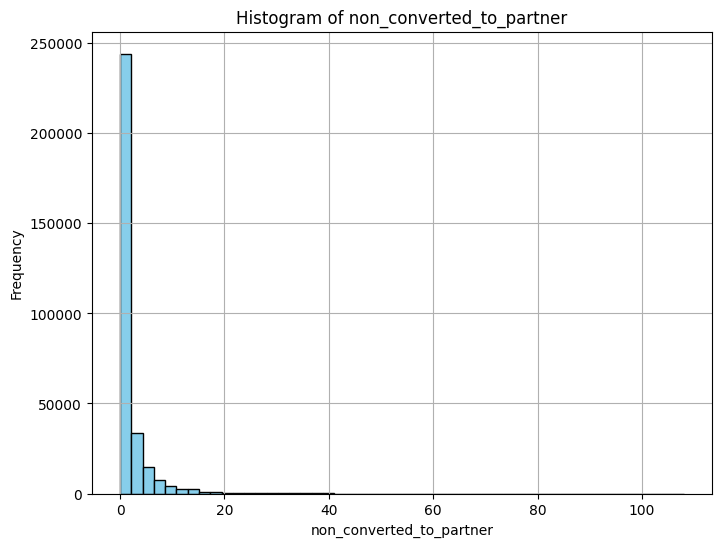

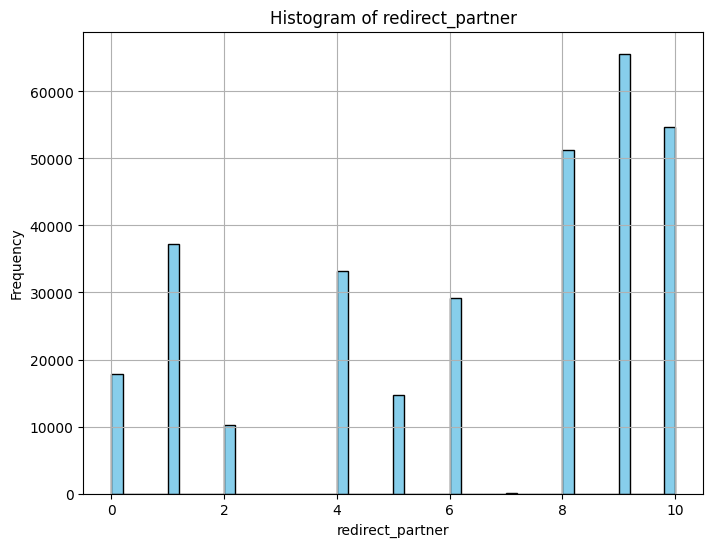

In [50]:
import matplotlib.pyplot as plt

def plot_histograms(df, features):
    for feature in features:
        plt.figure(figsize=(8, 6))
        plt.hist(df[feature], bins=50, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Example usage:
features_to_plot = ['different_redirect_partners', 'has_redirect_to_same_partner', 'different_postback_partners', 'b_cr_to_different_partner', 'a_cr_to_different_partner', 'non_converted_to_partner', 'redirect_partner'] # List of features to plot
plot_histograms(df, features_to_plot)  # Assuming df is your DataFrame


In [18]:
# Find columns containing the term "partner"
partner_columns = [col for col in df.columns if 'partner' in col.lower()]

# Display the list of partner-related columns
print("Partner-related columns:", partner_columns)

Partner-related columns: ['different_redirect_partners', 'has_redirect_to_same_partner', 'different_postback_partners', 'b_cr_to_different_partner', 'a_cr_to_different_partner', 'non_converted_to_partner', 'redirect_partner']


# Finding the correlation between features and target value

In [9]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

def pearson_correlation(df, conversion_revenue):
    """
    Calculate Pearson correlation coefficient for numerical features.
    """
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlations = {}
    for col in numerical_cols:
        corr, _ = pearsonr(df[col], df[conversion_revenue])
        correlations[col] = corr
    return correlations


# Calculate correlations for numerical features
numerical_correlations = pearson_correlation(df, 'conversion_revenue')

print("Pearson Correlation Coefficients for Numerical Features:")
print(numerical_correlations)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Pearson Correlation Coefficients for Numerical Features:
{'redirect_id': -0.00016378943609373102, 'lead_id': 0.0011003172489357734, 'redirect_timestamp': -0.00015224188332267234, 'lead_utm_source': 0.020955992355248084, 'lead_utm_medium': -0.004823924573449302, 'lead_utm_campaign': 0.012326037455946307, 'lead_hour_of_registration': -0.018315509480141472, 'lead_weekday_of_registration': 0.003657422822760764, 'lead_month_day_of_registration': -0.02005686299359599, 'lead_referrer': -0.011640878849988727, 'lead_brand': -0.005676113357173331, 'lead_ip_country_code': -0.0006923376954070594, 'lead_ip_region_name': -0.0031736693493277374, 'lead_ip_city': -0.00637330474947306, 'lead_ip_isp': -0.00041751591139739395, 'lead_ip_as_name': 0.0008475164857522975, 'lead_ip_is_hosting': -0.0011026409738568552, 'lead_ip_is_mobile': 0.002352716580912722, 'lead_ip_is_proxy': -0.0026735185148054133, 'lead_ua_device_class': -0.01576022431697651, 'lead_ua_device_name': -0.025406001188607995, 'lead_ua_device_

# Choosing the features with more correlation with target value

In [11]:
def select_features(numerical_correlations, threshold_corr=0.5, threshold_cramer_v=0.5):

    selected_numerical_features = [feat for feat, corr in numerical_correlations.items() if abs(corr) > threshold_corr]

    return selected_numerical_features,

# Example usage:
selected_numerical_features = select_features(numerical_correlations)

print("Selected Numerical Features:", selected_numerical_features)

Selected Numerical Features: (['converted_to_b', 'converted_to_a', 'conversion_revenue'],)


In [39]:
def select_top_features(correlation_dict, threshold=0.07, top_n=7):
    sorted_features = sorted(correlation_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    selected_features = [feat for feat, corr in sorted_features if abs(corr) > threshold][:top_n]
    return selected_features

# Example usage:
selected_top_numerical_features = select_top_features(numerical_correlations, threshold=0.07, top_n=7)

print("Top 5 Selected Numerical Features:", selected_top_numerical_features)




Top 5 Selected Numerical Features: ['different_redirect_sources', 'different_redirect_partners', 'conversion_revenue', 'converted_to_a', 'converted_to_b']


# Build LinearRegression model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = df[['converted_to_b', 'converted_to_a','different_redirect_sources', 'different_redirect_partners']]
#'different_redirect_partners', 'has_redirect_to_same_partner', 'different_postback_partners', 'b_cr_to_different_partner', 'a_cr_to_different_partner', 'non_converted_to_partner', 'redirect_partner'
y = df['conversion_revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.8044340588940213
R-squared: 0.9319536029863368


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = df[['converted_to_b', 'converted_to_a']]
#'different_redirect_partners', 'has_redirect_to_same_partner', 'different_postback_partners', 'b_cr_to_different_partner', 'a_cr_to_different_partner', 'non_converted_to_partner', 'redirect_partner'
y = df['conversion_revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.8102739788924582
R-squared: 0.9318491497329514


# Building model with DecisionTree

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = df[['converted_to_b', 'converted_to_a']]
y = df['conversion_revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the decision tree regressor model
model = DecisionTreeRegressor(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.7700733646712252
R-squared: 0.9325681809773216


# Building model with SVM

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = df[['converted_to_b', 'converted_to_a']]
y = df['conversion_revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the SVM regressor model
model = SVR()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 4.642967802513063
R-squared: 0.9169555246534343


In [43]:
# Define two sets of input data
example1 = {'converted_to_b': 0, 'converted_to_a': 1}
example2 = {'converted_to_b': 1, 'converted_to_a': 0}

# Convert input data to DataFrame
examples_df = pd.DataFrame([example1, example2])

# Use trained model to predict conversion revenue
predictions = model.predict(examples_df)

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Example {i+1} - Predicted Conversion Revenue: {pred}")


Example 1 - Predicted Conversion Revenue: 79.90000000007436
Example 2 - Predicted Conversion Revenue: 19.899999999998993


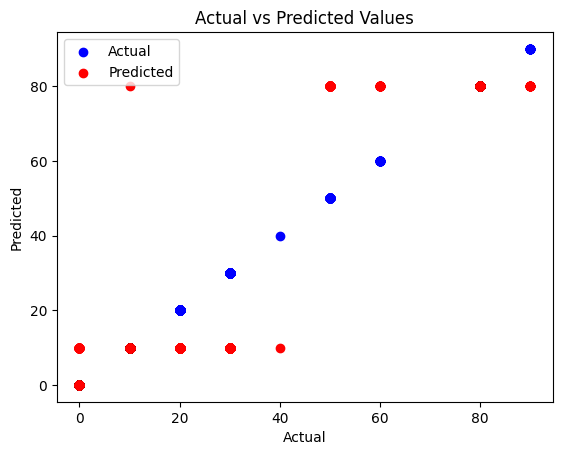

In [46]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='red', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
